In [1]:
import numpy as np
import pandas as pd
import healpy as hp
import matplotlib.pyplot as plt

In [2]:
%store -r nside
%store -r fwhm

In [3]:
# Point source map
%store -r ps_map_Q_obs
%store -r ps_map_U_obs

In [4]:
# Noise map
%store -r noise_Q_obs
%store -r noise_U_obs

In [5]:
# Power spectrum of the simulated CMB map
%store -r cl_TT_simulated_obs
%store -r cl_EE_simulated_obs
%store -r cl_BB_simulated_obs
%store -r cl_TE_simulated_obs

In [6]:
ps_map_Q = ps_map_Q_obs
ps_map_U = ps_map_U_obs
noise_Q = noise_Q_obs
noise_U = noise_U_obs
cl_TT_simulated = cl_TT_simulated_obs
cl_EE_simulated = cl_EE_simulated_obs
cl_BB_simulated = cl_BB_simulated_obs
cl_TE_simulated = cl_TE_simulated_obs

In [7]:
# Create CMB maps from the cls
cmb_simulated_cls = [cl_TT_simulated, cl_EE_simulated, cl_BB_simulated, cl_TE_simulated]
cmb_simulated_maps = hp.synfast(cmb_simulated_cls, nside, pol=True, fwhm=fwhm, new=True) # hp.smoothing? although fwhm already fixed
cmb_Q = cmb_simulated_maps[1]
cmb_U = cmb_simulated_maps[2]

In [8]:
# Data input map 
data_Q_map = cmb_Q + ps_map_Q + noise_Q
data_U_map = cmb_U + ps_map_U + noise_U
data_P_map = np.sqrt(data_Q_map**2 + data_U_map**2)

In [9]:
data_Q_map_obs = data_Q_map 
data_U_map_obs = data_U_map
data_P_map_obs = data_P_map

In [10]:
%store data_P_map_obs
%store data_Q_map_obs
%store data_U_map_obs

Stored 'data_P_map_obs' (ndarray)
Stored 'data_Q_map_obs' (ndarray)
Stored 'data_U_map_obs' (ndarray)


In [11]:
# Centers of patches for 3.63º x 3.63º (https://arxiv.org/abs/1909.04701)
df = pd.read_csv("lon_lat13deg2.txt", header=None, delim_whitespace=True, names=["lon", "lat"]) 
coords = np.array(df)
lon = coords[:,0]
lat = coords[:,1]

In [12]:
# Map division with hp.gnomview 
reso = hp.nside2resol(nside, arcmin=True) # 2D map same pixel resolution as the 3D map of the sphere so that after the projection it is not very deformed
xsize = 64

In [13]:
# For the data
map_cut_data_P = [hp.gnomview(data_P_map, rot=[lon[i], lat[i]], xsize = xsize, reso = reso, return_projected_map = True, no_plot = True) for i in range(len(coords))]

In [14]:
map_cut_data_Q = [hp.gnomview(data_Q_map, rot=[lon[i], lat[i]], xsize = xsize, reso = reso, return_projected_map = True, no_plot = True) for i in range(len(coords))]

In [15]:
map_cut_data_U = [hp.gnomview(data_U_map, rot=[lon[i], lat[i]], xsize = xsize, reso = reso, return_projected_map = True, no_plot = True) for i in range(len(coords))]

In [16]:
# Convert to array to then reshape
map_cut_data_P = np.array(map_cut_data_P)
map_cut_data_Q = np.array(map_cut_data_Q)
map_cut_data_U = np.array(map_cut_data_U)

In [17]:
# Reshape data and labels
def reshape(array):
    N = len(array)
    return np.reshape(array, (N, xsize, xsize, 1))
map_cut_data_P_obs = reshape(map_cut_data_P)
map_cut_data_Q = reshape(map_cut_data_Q)
map_cut_data_U = reshape(map_cut_data_U)

In [18]:
map_cut_data_QU_obs = np.concatenate((map_cut_data_Q, map_cut_data_U), axis = -1)

In [19]:
%store map_cut_data_QU_obs
%store map_cut_data_P_obs

Stored 'map_cut_data_QU_obs' (ndarray)
Stored 'map_cut_data_P_obs' (ndarray)


#### **EB**

In [33]:
cmb_E = hp.synfast(cl_EE_simulated_obs, nside = nside, pol = False, fwhm = fwhm)
cmb_B = hp.synfast(cl_BB_simulated_obs, nside = nside, pol = False, fwhm = fwhm)

In [34]:
# Point sources:
%store -r E_obs
%store -r B_obs

In [35]:
%store -r cl_noise_EE_simulated_obs
%store -r cl_noise_BB_simulated_obs

In [36]:
noise_E = hp.synfast(cl_noise_EE_simulated_obs, nside = nside, pol = False, fwhm = fwhm)
noise_B = hp.synfast(cl_noise_BB_simulated_obs, nside = nside, pol = False, fwhm = fwhm)

In [38]:
data_E_map = cmb_E + E_obs + noise_E
data_B_map = cmb_B + B_obs + noise_B

In [50]:
data_E_map_obs = data_E_map
data_B_map_obs = data_B_map

In [51]:
%store data_E_map_obs
%store data_B_map_obs

Stored 'data_E_map_obs' (ndarray)
Stored 'data_B_map_obs' (ndarray)


In [39]:
map_cut_data_E_obs = [hp.gnomview(data_E_map, rot=[lon[i], lat[i]], xsize = xsize, reso = reso, return_projected_map = True, no_plot = True) for i in range(len(coords))]

In [40]:
map_cut_data_B_obs = [hp.gnomview(data_B_map, rot=[lon[i], lat[i]], xsize = xsize, reso = reso, return_projected_map = True, no_plot = True) for i in range(len(coords))]

In [41]:
map_cut_data_E_obs = np.array(map_cut_data_E_obs)
map_cut_data_B_obs = np.array(map_cut_data_B_obs)

In [42]:
map_cut_data_E_obs = reshape(map_cut_data_E_obs)
map_cut_data_B_obs = reshape(map_cut_data_B_obs)

In [44]:
map_cut_data_EB_obs = np.concatenate((map_cut_data_E_obs, map_cut_data_B_obs), axis = -1)

In [45]:
%store map_cut_data_EB_obs

Stored 'map_cut_data_EB_obs' (ndarray)


In [46]:
%store map_cut_data_E_obs
%store map_cut_data_B_obs

Stored 'map_cut_data_E_obs' (ndarray)
Stored 'map_cut_data_B_obs' (ndarray)


#### **Label vs Prediction visualisation**

In [53]:
%store -r prediction_P_64pix_9epoch_10batch_sol

In [62]:
from matplotlib.colors import LogNorm

/tmp/ipykernel_783545/1978339269.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


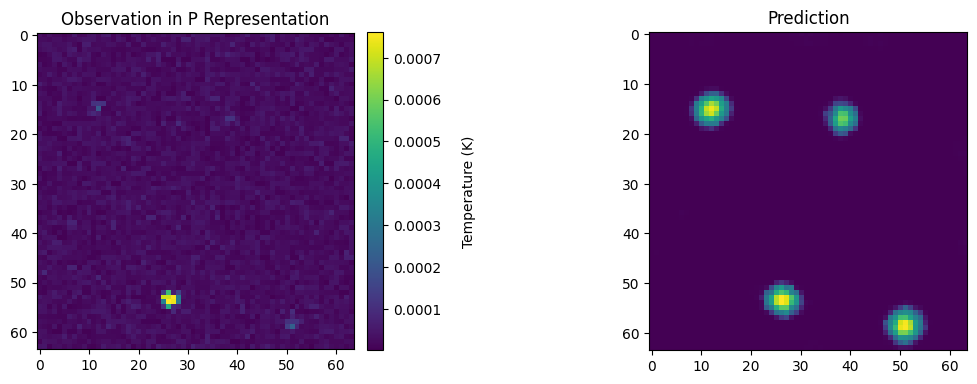

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 0.92], 'wspace': 0.8})

cmap = 'viridis'

im1 = axs[0].imshow(map_cut_data_P_obs[1714], cmap=cmap, aspect='equal')
axs[0].set_title('Observation in P Representation')

cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)
cbar1.set_label('Temperature (K)', labelpad=15)  

im2 = axs[1].imshow(prediction_P_64pix_9epoch_10batch_sol[1714], cmap=cmap, aspect='equal')
axs[1].set_title('Prediction')

plt.tight_layout()

fig.savefig('output_figure_obs.png', dpi=300) 

plt.show()